In [19]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from bs4 import BeautifulSoup
from playwright.async_api import async_playwright, TimeoutError as PlaywrightTimeout
import time

In [13]:
games_df = pd.read_csv("/Users/sanjith/Downloads/archive (4)/games.csv")
boxscores_df = pd.read_csv("/Users/sanjith/Downloads/archive (4)/boxscore.csv")

In [14]:
merged_df = pd.merge(games_df, boxscores_df, on='game_id', how='left')

player_names = {}


for game_id in games_df['game_id'].unique():
    
    players = boxscores_df[boxscores_df['game_id'] == game_id]['playerName'].tolist()
    player_names[game_id] = players

player_names_df = pd.DataFrame.from_dict(player_names, orient='index')
player_names_df.reset_index(inplace=True)
player_names_df.rename(columns={'index': 'game_id'}, inplace=True)

In [15]:
final_df = pd.merge(games_df, player_names_df, on='game_id', how='left')
final_df.to_csv('games_with_players.csv', index=False)

In [16]:
final_df.head()

,seasonStartYear,awayTeam,pointsAway,homeTeam,pointsHome,attendance,notes,startET,datetime,isRegular,...,23,24,25,26,27,28,29,30,31,32
0,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,...,None,None,None,None,None,None,None,None,None,None
1,1996,Los Angeles Clippers,97,Golden State Warriors,85,15593.0,NaN,NaN,1996-11-01,1,...,Lou Roe,None,None,None,None,None,None,None,None,None
2,1996,Portland Trail Blazers,114,Vancouver Grizzlies,85,19193.0,NaN,NaN,1996-11-01,1,...,Rich Manning,None,None,None,None,None,None,None,None,None
3,1996,Seattle SuperSonics,91,Utah Jazz,99,19911.0,NaN,NaN,1996-11-01,1,...,Brooks Thompson,None,None,None,None,None,None,None,None,None
4,1996,New York Knicks,107,Toronto Raptors,99,28457.0,NaN,NaN,1996-11-01,1,...,Acie Earl,None,None,None,None,None,None,None,None,None


In [18]:
import pandas as pd
import os




def get_player_names_with_gap(game_id, boxscores_df, gap_size=6):
    # Get player names for the given game_id
    players_data = boxscores_df[boxscores_df['game_id'] == game_id]
    
    
    teams = players_data['teamName'].unique()
    
    if len(teams) != 2:
        
        print(f"Warning: game_id {game_id} does not have exactly two teams. Skipping.")
        return []
    
    team1_players = players_data[players_data['teamName'] == teams[0]]['playerName'].tolist()
    team2_players = players_data[players_data['teamName'] == teams[1]]['playerName'].tolist()
    
    
    combined_players = team1_players + [None] * gap_size + team2_players
    return combined_players


player_names = {}


for game_id in games_df['game_id'].unique():
    
    players_with_gap = get_player_names_with_gap(game_id, boxscores_df)
    
    
    player_names[game_id] = players_with_gap


player_names_df = pd.DataFrame.from_dict(player_names, orient='index')


player_names_df.reset_index(inplace=True)
player_names_df.rename(columns={'index': 'game_id'}, inplace=True)

final_df = pd.merge(games_df, player_names_df, on='game_id', how='left')
final_df.to_excel('games_with_players.xlsx', index=False)


In [22]:
df = pd.read_excel("/Users/sanjith/Downloads/games_with_players (1).xlsx")
del df['startET']
del df['notes']
df.head()

,seasonStartYear,awayTeam,pointsAway,homeTeam,pointsHome,attendance,datetime,isRegular,game_id,AT1,...,HT5,HT6,HT7,HT8,HT9,HT10,HT11,HT12,HT13,HT14
0,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,1996-11-01,1,1,Corliss Williamson,...,Mario Elie,Othella Harrington,Randy Livingston,Matt Bullard,Sam Mack,Tracy Moore,Emanual Davis,Charles Barkley,NaN,NaN
1,1996,Los Angeles Clippers,97,Golden State Warriors,85,15593.0,1996-11-01,1,2,Loy Vaught,...,Todd Fuller,Bimbo Coles,B.J. Armstrong,Ray Owes,Andrew DeClercq,Clifford Rozier,Donyell Marshall,Lou Roe,NaN,NaN
2,1996,Portland Trail Blazers,114,Vancouver Grizzlies,85,19193.0,1996-11-01,1,3,Kenny Anderson,...,Eric Mobley,Blue Edwards,Pete Chilcutt,Lee Mayberry,Roy Rogers,George Lynch,Lawrence Moten,Rich Manning,NaN,NaN
3,1996,Seattle SuperSonics,91,Utah Jazz,99,19911.0,1996-11-01,1,4,Detlef Schrempf,...,Greg Ostertag,Antoine Carr,Adam Keefe,Chris Morris,Greg Foster,Howard Eisley,Shandon Anderson,Brooks Thompson,NaN,NaN
4,1996,New York Knicks,107,Toronto Raptors,99,28457.0,1996-11-01,1,5,Allan Houston,...,Walt Williams,Carlos Rogers,Hubert Davis,Sharone Wright,Marcus Camby,Donald Whiteside,Benoit Benjamin,Acie Earl,NaN,NaN


In [23]:
import pandas as pd
df['Winning_team'] = df.apply(lambda row: row['awayTeam'] if row['pointsAway'] > row['pointsHome'] else row['homeTeam'], axis=1)

In [26]:
del df['Empty']
del df['attendance']
del df['isRegular']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   seasonStartYear  30250 non-null  int64         
 1   awayTeam         30250 non-null  object        
 2   pointsAway       30250 non-null  int64         
 3   homeTeam         30250 non-null  object        
 4   pointsHome       30250 non-null  int64         
 5   datetime         30250 non-null  datetime64[ns]
 6   game_id          30250 non-null  int64         
 7   AT1              30249 non-null  object        
 8   AT2              30249 non-null  object        
 9   AT3              30249 non-null  object        
 10  AT4              30249 non-null  object        
 11  AT5              30249 non-null  object        
 12  AT6              30249 non-null  object        
 13  AT7              30249 non-null  object        
 14  AT8              30249 non-null  objec

In [36]:
#df.replace({'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans'}, inplace=True) 
df.replace({'New Jersey Nets': 'Brooklyn Nets'}, inplace=True) 
df.replace({'Vancouver Grizzlies': 'Memphis Grizzlies'}, inplace=True) 
df.replace({'Washington Bullets': 'Washington Wizards'}, inplace=True) 
df.replace({'New Orleans Hornets': 'New Orleans Pelicans'}, inplace=True) 
df.replace({'Charlotte Bobcats': 'Charlotte Hornets'}, inplace=True) 
df.replace({'Seattle SuperSonics': 'Oklahoma City Thunder'}, inplace=True) 

df['awayTeam'].nunique()


30

In [31]:
import datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [39]:
df.replace({'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans'}, inplace=True) 
df.replace({'New Jersey Nets': 'Brooklyn Nets'}, inplace=True) 
df.replace({'Vancouver Grizzlies': 'Memphis Grizzlies'}, inplace=True) 
df.replace({'Washington Bullets': 'Washington Wizards'}, inplace=True) 
df.replace({'New Orleans Hornets': 'New Orleans Pelicans'}, inplace=True) 
df.replace({'Charlotte Bobcats': 'Charlotte Hornets'}, inplace=True) 
df.replace({'Seattle SuperSonics': 'Oklahoma City Thunder'}, inplace=True)
df['homeTeam'].value_counts()

homeTeam
San Antonio Spurs         1096
Los Angeles Lakers        1081
Miami Heat                1078
Boston Celtics            1062
Indiana Pacers            1045
Oklahoma City Thunder     1035
Utah Jazz                 1032
Houston Rockets           1031
Dallas Mavericks          1031
Cleveland Cavaliers       1031
Detroit Pistons           1030
Golden State Warriors     1023
Chicago Bulls             1021
Portland Trail Blazers    1015
Toronto Raptors           1014
Philadelphia 76ers        1013
Atlanta Hawks             1011
Brooklyn Nets             1011
Phoenix Suns              1007
Denver Nuggets            1003
Milwaukee Bucks           1001
Los Angeles Clippers      1001
Orlando Magic             1000
New York Knicks            994
Memphis Grizzlies          993
Washington Wizards         988
Sacramento Kings           988
Minnesota Timberwolves     976
Charlotte Hornets          890
New Orleans Pelicans       749
Name: count, dtype: int64

<Axes: >

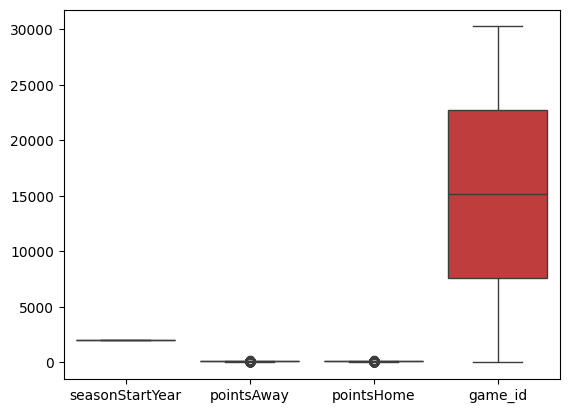

In [40]:
sns.boxplot(df)

In [41]:
df.describe()

,seasonStartYear,pointsAway,pointsHome,datetime,game_id
count,30250.000000,30250.000000,30250.000000,30250,30250.000000
mean,2007.660033,97.851504,100.934413,2008-09-28 13:30:32.489256192,15125.500000
min,1996.000000,53.000000,49.000000,1996-11-01 00:00:00,1.000000
25%,2002.000000,89.000000,92.000000,2003-01-04 00:00:00,7563.250000
50%,2008.000000,97.000000,101.000000,2008-11-27 00:00:00,15125.500000
75%,2014.000000,106.000000,109.000000,2014-11-15 00:00:00,22687.750000
max,2019.000000,168.000000,168.000000,2020-10-11 00:00:00,30250.000000
std,6.834779,12.869831,12.910928,NaN,8732.567158


In [42]:
df.fillna({"" : "Nan"})

,seasonStartYear,awayTeam,pointsAway,homeTeam,pointsHome,datetime,game_id,AT1,AT2,AT3,...,HT6,HT7,HT8,HT9,HT10,HT11,HT12,HT13,HT14,Winning_team
0,1996,Sacramento Kings,85,Houston Rockets,96,1996-11-01,1,Corliss Williamson,Mitch Richmond,Olden Polynice,...,Othella Harrington,Randy Livingston,Matt Bullard,Sam Mack,Tracy Moore,Emanual Davis,Charles Barkley,NaN,NaN,Houston Rockets
1,1996,Los Angeles Clippers,97,Golden State Warriors,85,1996-11-01,2,Loy Vaught,Malik Sealy,Pooh Richardson,...,Bimbo Coles,B.J. Armstrong,Ray Owes,Andrew DeClercq,Clifford Rozier,Donyell Marshall,Lou Roe,NaN,NaN,Los Angeles Clippers
2,1996,Portland Trail Blazers,114,Memphis Grizzlies,85,1996-11-01,3,Kenny Anderson,Clifford Robinson,Rasheed Wallace,...,Blue Edwards,Pete Chilcutt,Lee Mayberry,Roy Rogers,George Lynch,Lawrence Moten,Rich Manning,NaN,NaN,Portland Trail Blazers
3,1996,Oklahoma City Thunder,91,Utah Jazz,99,1996-11-01,4,Detlef Schrempf,Gary Payton,Shawn Kemp,...,Antoine Carr,Adam Keefe,Chris Morris,Greg Foster,Howard Eisley,Shandon Anderson,Brooks Thompson,NaN,NaN,Utah Jazz
4,1996,New York Knicks,107,Toronto Raptors,99,1996-11-01,5,Allan Houston,Buck Williams,Charlie Ward,...,Carlos Rogers,Hubert Davis,Sharone Wright,Marcus Camby,Donald Whiteside,Benoit Benjamin,Acie Earl,NaN,NaN,New York Knicks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2019,Miami Heat,114,Los Angeles Lakers,124,2020-10-02,30246,Jimmy Butler,Tyler Herro,Jae Crowder,...,Rajon Rondo,Alex Caruso,Kyle Kuzma,Markieff Morris,J.R. Smith,JaVale McGee,Jared Dudley,Talen Horton-Tucker,NaN,Los Angeles Lakers
30246,2019,Los Angeles Lakers,104,Miami Heat,115,2020-10-04,30247,LeBron James,Anthony Davis,Kentavious Caldwell-Pope,...,Kelly Olynyk,Kendrick Nunn,Andre Iguodala,Solomon Hill,Derrick Jones Jr.,Bam Adebayo,Chris Silva,Udonis Haslem,NaN,Miami Heat
30247,2019,Los Angeles Lakers,102,Miami Heat,96,2020-10-06,30248,Anthony Davis,LeBron James,Kentavious Caldwell-Pope,...,Kendrick Nunn,Andre Iguodala,Kelly Olynyk,Chris Silva,Udonis Haslem,Solomon Hill,Meyers Leonard,Derrick Jones Jr.,NaN,Los Angeles Lakers
30248,2019,Miami Heat,111,Los Angeles Lakers,108,2020-10-09,30249,Jimmy Butler,Jae Crowder,Bam Adebayo,...,Alex Caruso,Markieff Morris,Kyle Kuzma,Rajon Rondo,Quinn Cook,Jared Dudley,J.R. Smith,JaVale McGee,NaN,Miami Heat


In [53]:
df['year'] = df['datetime'].dt.year
df['quarter'] = df['datetime'].dt.quarter
df['day_of_week'] = df['datetime'].dt.dayofweek

In [54]:
from sklearn.preprocessing import LabelEncoder
last_date = df['datetime'].max()
cutoff_date = last_date - pd.DateOffset(months=6)

train_df = df[df['datetime'] < cutoff_date]
test_df = df[df['datetime'] >= cutoff_date]

In [48]:
del train_df['game_id']
del test_df['game_id']

In [55]:
del train_df['datetime']
del test_df['datetime']

In [67]:
del train_df['pointsAway']
del train_df['pointsHome']
del test_df['pointsAway']
del test_df['pointsHome']

In [68]:
le = LabelEncoder()


for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = le.fit_transform(train_df[col])


for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = le.fit_transform(test_df[col])

In [69]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

X_train = train_df.drop(['Winning_team'],axis=1)
X_test = test_df.drop(['Winning_team'],axis=1)
y_train = train_df['Winning_team']
y_test = test_df['Winning_team']

In [70]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train,y_train)
prediction_rf = rf_model.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score,f1_score

accuracy = accuracy_score(y_test, prediction_rf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.11046511627906977


In [79]:
test_df

,seasonStartYear,awayTeam,homeTeam,game_id,AT1,AT2,AT3,AT4,AT5,AT6,...,HT9,HT10,HT11,HT12,HT13,HT14,Winning_team,year,quarter,day_of_week
30078,2019,20,11,30079,21,74,65,81,38,41,...,69,26,28,67,43,0,20,2020,3,3
30079,2019,6,7,30080,64,71,48,59,27,34,...,24,42,64,75,33,0,7,2020,3,3
30080,2019,17,18,30081,16,30,3,67,70,10,...,74,23,98,12,47,0,18,2020,3,4
30081,2019,4,2,30082,69,36,11,78,66,5,...,49,8,4,38,38,0,4,2020,3,4
30082,2019,15,21,30083,20,16,64,77,5,14,...,47,51,0,37,4,0,15,2020,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30245,2019,9,7,30246,40,87,34,19,60,47,...,59,42,34,40,76,0,7,2020,4,4
30246,2019,7,9,30247,52,2,51,15,15,63,...,81,18,7,15,86,0,9,2020,4,6
30247,2019,7,9,30248,2,53,51,15,15,53,...,14,107,85,62,14,0,7,2020,4,1
30248,2019,9,7,30249,40,34,2,19,84,48,...,75,84,36,39,31,0,9,2020,4,4


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
prediction = gb_model.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4418604651162791


In [89]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Define the model
gb = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2,0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100; total time= 6.3min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100; total time= 6.5min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100; total time= 6.7min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200; total time=13.6min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100; total time= 7.6min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200; total time=14.1min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100; total time= 9.2min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=200; total time=16.0min
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100; total time= 9.0min
[CV] END learning_rate=0.1, max_depth=3, min_sa

KeyboardInterrupt: 

In [74]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R^2) Score: {r2}')

Mean Squared Error: 41.73407940758584
Root Mean Squared Error: 6.460191901761576
Mean Absolute Error: 5.434189750877923
R-squared (R^2) Score: -0.10389473838023533


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))



Accuracy: 0.31

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.13      0.20        15
           1       0.00      0.00      0.00         5
           2       0.18      0.40      0.25         5
           3       0.00      0.00      0.00        12
           4       0.50      0.22      0.31         9
           5       0.50      0.17      0.25         6
           6       0.54      0.58      0.56        12
           7       0.80      0.63      0.71        19
           8       0.00      0.00      0.00         2
           9       0.25      0.29      0.27        17
          10       0.25      0.25      0.25         8
          11       0.17      0.50      0.25         2
          12       0.00      0.00      0.00         7
          13       0.04      0.25      0.07         4
          14       0.40      0.50      0.44         4
          15       0.83      0.62      0.71         8
          16       0.75      0.38      0.5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

print("\nBest Model Classification Report:")
print(classification_report(y_test, y_pred_best))

print("\nBest Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2; total time=   0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [87]:
accuracy_best

0.5058139534883721